In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_21572_10_csv = pd.read_excel("analiza_jazdy_na_biegu_wstecznym/21572_data_table_full_2024-10-10.xlsx")  

In [ ]:
df_21572_10 = df_21572_10_csv[["Velocity [km/h]", "RPM", "Fuel level", 'predkosc_osi', "latitude", "longitude", 
                    "Vehicle mass [kg]", "distance_m", "Distance [km]", "Active gear"]]

df_21572_10 = df_21572_10[df_21572_10["longitude"] > 9.5]
df_21572_10["Active gear"] = pd.to_numeric(df_21572_10["Active gear"], errors='coerce') # Convert 'Active gear' column to numeric
df_21572_10 = df_21572_10.dropna(subset=["Active gear"])


df_21572_10 = df_21572_10.replace({'NaN': np.nan}) 
missing_data = df_21572_10.isna().sum()

columns_to_impute = df_21572_10.columns[df_21572_10.isna().sum() > 0]

for column in columns_to_impute:
    
    df_with_no_missing = df_21572_10[df_21572_10[column].notna()]
    
    X = df_with_no_missing.drop(columns=[column])
    y = df_with_no_missing[column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error for {column}: {mae}")

    missing_data = df_21572_10[df_21572_10[column].isna()]
    X_missing = missing_data.drop(columns=[column])

    predicted_values = model.predict(X_missing)
    df_21572_10.loc[df_21572_10[column].isna(), column] = predicted_values

print(df_21572_10.isna().sum())


Mean Absolute Error for Velocity [km/h]: 0.0021934648446110044
Mean Absolute Error for RPM: 30.52027723027011
Mean Absolute Error for Fuel level: 0.024806032596966288
Mean Absolute Error for predkosc_osi: 0.4382304564797666
Mean Absolute Error for Vehicle mass [kg]: 6.278532865308878
Velocity [km/h]      0
RPM                  0
Fuel level           0
predkosc_osi         0
latitude             0
longitude            0
Vehicle mass [kg]    0
distance_m           0
Distance [km]        0
Active gear          0
dtype: int64


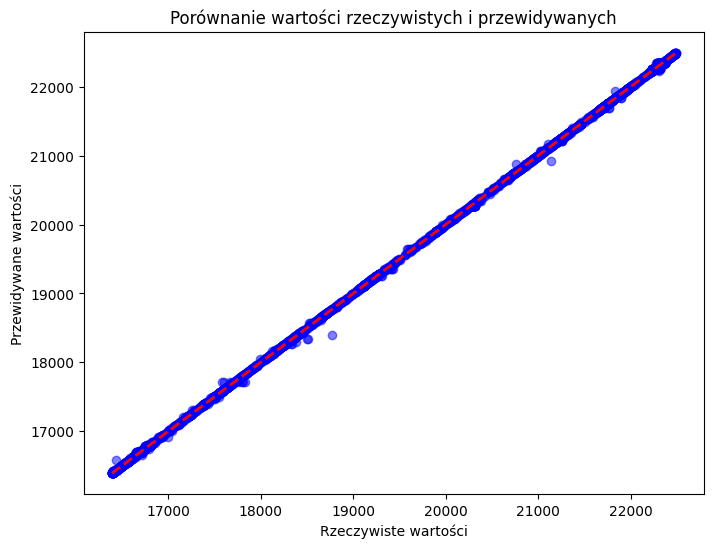

In [ ]:
real_values = y_test 
predicted_values = y_pred

plt.figure(figsize=(8, 6))
plt.scatter(real_values, predicted_values, color='blue', alpha=0.5)
plt.plot([real_values.min(), real_values.max()], [real_values.min(), real_values.max()], 'r--', lw=2)  # Linia idealnej zgodności
plt.title('Porównanie wartości rzeczywistych i przewidywanych')
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.show()
